# Table generation

In [1]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_6years/uw963'))
from uw.like2 import (process,main,maps,); 
map( reload,         (process,main,maps,) );

In [10]:
file?

In [8]:
import os, pickle
from skymaps import Band
def make_index_table(nside=12, subnside=512, usefile=True):
    """create, and/or use a table to convert between different nside pixelizations
    """
    filename = os.path.expandvars('$FERMI/misc/index_table_%02d_%03d.pickle' % (nside, subnside) )
    if os.path.exists(filename) and usefile:
        return pickle.load(open(filename))
    print 'generating index table for nside, subnside= %d %d' % (nside, subnside)
    band, subband = Band(nside), Band(subnside)
    npix, nsubpix = 12*nside**2, 12*subnside**2
    t=np.array([band.index(subband.dir(i)) for i in xrange(nsubpix)])
    a = np.arange(nsubpix)
    index_table = [a[t==i] for i in xrange(npix)]
    if usefile:
        pickle.dump(index_table, open(filename,'w'))
    return index_table
%time make_index_table()

generating index table for nside, subnside= 12 512
CPU times: user 20.3 s, sys: 348 ms, total: 20.7 s
Wall time: 21.6 s


[array([    0,     4,     5, ..., 13985, 13986, 14322]),
 array([    1,     6,     7, ..., 14069, 14070, 14407]),
 array([    2,     8,     9, ..., 14153, 14154, 14492]),
 array([    3,    10,    11, ..., 14237, 14238, 14577]),
 array([ 3784,  3960,  3961, ..., 31541, 31542, 32046]),
 array([ 3827,  4003,  4004, ..., 31583, 31584, 32088]),
 array([ 3828,  4005,  4006, ..., 31667, 31668, 32173]),
 array([ 3871,  4048,  4049, ..., 31709, 31710, 32215]),
 array([ 3872,  4050,  4051, ..., 31793, 31794, 32300]),
 array([ 3915,  4093,  4094, ..., 31835, 31836, 32342]),
 array([ 3916,  4095,  4096, ..., 31919, 31920, 32427]),
 array([ 3959,  4138,  4139, ..., 31961, 31962, 32469]),
 array([14620, 14964, 14965, ..., 56825, 56826, 57502]),
 array([15007, 15355, 15356, ..., 56195, 56196, 56868]),
 array([14705, 15049, 15050, ..., 56910, 56911, 57587]),
 array([14706, 15051, 15052, ..., 56994, 56995, 57672]),
 array([15094, 15443, 15444, ..., 56363, 56364, 57037]),
 array([14791, 15136, 15137, ..

In [2]:
r= process.Process('.', xtables_flag=True, residual_flag=False)

Using configuration file "config.txt" in folder: /nfs/farm/g/glast/u55/catalog/pointlike/skymodels/P301_6years/uw963/.
Opening dataset P301_6years from key in /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/dataspec.py
FT file(s) "/afs/slac/g/glast/groups/catalog//pointlike/fermi/data/../../P8_P301/Source/P301_*.fits" not found: assume None to test for valid binfile
Extracting DSS from existing binfile
GTI from binfile Gti: 38437 intervals from 239557417 to 428689918, on time 150881091
Verified binfile /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/P8_P301/6years_4bpd.fits
no header info in ltcube?
Accepting ltcube without DSS info since legacy specified
Failed gti check:
  ltcube: Gti: 37884 intervals from 239557417 to 428689918, on time 150902856 
 binfile: Gti: 38437 intervals from 239557417 to 428689918, on time 150881091
loading binfile /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/P8_P301/6years_4bpd.fits ... found 162070183 photons in 40 bands, energies 1

In [3]:
#r.load_kw={'rings':-1}
r.setup_roi(888); 

3 total sources: 0 extended, 3 global


In [4]:
r.summarize()
#r.selected = [b for b in r if b.band.energy>10000]
#r.summarize()

current likelihood, est. diff to peak: 1121535.1, -535.78
Name                  index     value  error(%)  gradient
isotrop_Scale             0    0.7733      11.6   -1753.9


In [5]:
r.process()

2015-02-26 11:03:30 - HP12_0888 - interactive
filling table ts10  with 1849 entries...  min=   0.0, max= 700.5, mean=   1.5  --> ./ts10_table_512/HP12_0888.pickle


In [6]:
from uw.like2 import maps
rt = maps.ROItables(self.outdir, nside=self.tables_nside,
       skyfuns= ( 
        (maps.ResidualTS, 'tsx', dict(photon_index=2.3),) , 
      ),
       )


NameError: name 'self' is not defined

In [ ]:
rt(self)

In [ ]:
maps.DisplayTable('ts50', 812).plot()

In [7]:
from uw.like2.analyze import hptables; reload(hptables)
hpt = hptables.HPtables()


loaded file hptables_ts10_ts50_512.fits 
Seedfile seeds.txt not found


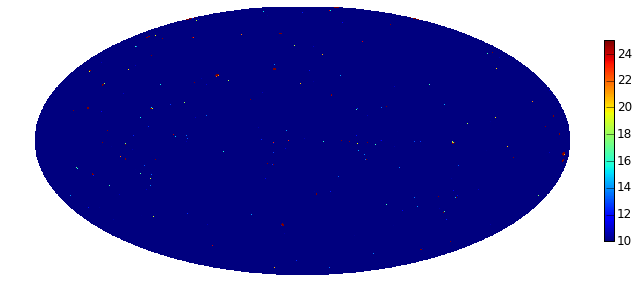

In [8]:
hpt.tsname='ts50'
hpt.ts_map();

In [12]:
from uw.like2.pub import healpix_map; reload(healpix_map)
hpts = healpix_map.HParray('ts50', hpt.tables['ts50']); hpts

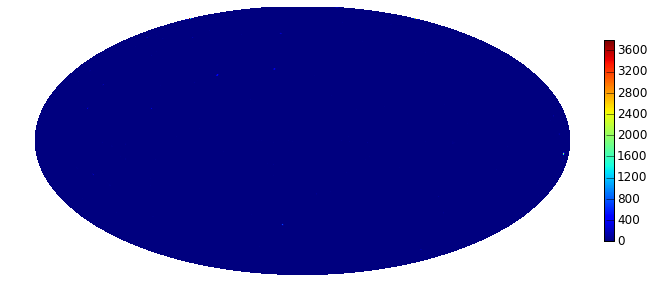

In [16]:
ait = hpts.plot(ait_kw=dict(pixelsize=0.10)); ait

In [21]:
from skymaps import SkyDir
self=ait
self.skyimage.reimage(SkyDir(0,0, SkyDir.GALACTIC), 'test.fits', self.pixelsize, self.size,self.proj, True)

In [22]:
!ls -l *.fits

-rw-rw-r-- 1 burnett glast-pipeline 25174080 Feb 25 09:13 hptables_ts10_ts50_512.fits
-rw-rw-r-- 1 burnett glast-pipeline 21064320 Feb 26 11:53 test.fits


In [ ]:
from uw.like2.pub import healpix_map
healpix_map.assemble_tables(['ts10', 'ts50'])


In [ ]:
hpt.tsname='ts10'
hpt.ts_map();

In [ ]:
!ls $FERMI/catalog/2FHL*

In [ ]:
import pyfits
filename = os.path.expandvars('$FERMI/catalog/2FHL_catalog_v0.fits')
pf = pyfits.open(filename)
subset=pf[1].columns[:11]
tbhdu = pyfits.BinTableHDU.from_columns(subset)
pps = pd.DataFrame(tbhdu.data)
pps.to_csv(filename.replace('fits','csv'), indexcol=0)

In [ ]:
fig, axx = plt.subplots(1,2, figsize=(10,5))
ax = axx[0]
ax.hist(pps.Spectral_Index.clip(0.8), np.linspace(0,8,17));
plt.setp(ax, xlabel='Spectral Index')
ax.grid()
ax=axx[1]
ax.scatter(pps.Spectral_Index.clip(0,8), pps.TS)
plt.setp(ax, xlim=(0,8.1), yscale='log', ylabel='TS', xlabel='Spectral index')
ax.grid()
ax.axhline(25);

In [ ]:
pps[pps.Spectral_Index>5][]